Henry (Hank) Besser

- Importing the NumPy and PlyPlot modules and assigning them shorter, more usable aliases(i.e. np and plt, respectively). Also making sure the figures show up in-line using a magic function (%matplotlib inline) for overall coherency of the report.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Problem under study: 

Solving the pendulum system, where,

$$ Equation 1: \frac{d^2\theta}{dt^2} =  \frac{-g}{l}sin(\theta) $$

and writing a script to solve the equations:

$$ \\Equation 2: \\\frac{d\theta}{dt} =  \omega \\\frac{d\omega}{dt} = \frac{-g}{l}sin(\theta) $$


where $\theta$ is the angular displacement from vertical, $\frac{d\theta}{dt} =  \omega$ is the angular velocity, and $\frac{d\omega}{dt} = \frac{-g}{l}sin(\theta)$ is the angular acceleration.

$g = 9.81 m/s^2$ and as given, $l = 1m$. In the first part of the lab we, ther is an comparison of what happens when changing the initial angular displacement angle $\theta_{0}$ with the initial angular velocity $\omega_{0}$ equal to 0 

Assuming zero friction at the top mount of the pendulum and no atmospheric drag, the simple problem is modeled with Equations 1-3. The only force is gravity, g, and the first goal is to investigate the relationship between the amplitude and period of the oscillation

#### The Euler-Cromer Method:

A slight modification of the Euler equations equation (used in previous labs), allows an improvement in the local error for the the problem at hand. The total energy in the simple pendulum system should remain constant (since it is a
conservative system), where 

 $$Equation 4: E = \frac{1}{2}ml^2 \omega^2 - mgl(1-cos(\theta)$$


Last, the goal is to find relationship between the amplitude and period of the oscillation numerically. When the amplitude is large, the pendulum spends a longer time at its turning points, and by modifying the script, it is possible to get the numerical solutions for the period of oscillation for the three different $\theta{_0}$ (initial displacement angles). By finding the minimum for the first time and finding the time that represent $T$/2, the period $T$ can easily be found The scripts below throughly explain the Euler method below and fully explain the methodology and details of this lab.



#### Methods and Thorough Descriptions in the Code

In [2]:
def pendulum_euler_cromer(theta0, omega0, length, time0, time_f, dt):
    """
    Numerical solutions to the simple ossilatory motion problem.
    
    Calculates theta as a function of time using the Euler-Cromer method.
    
    This leads one to investigate the relationship between
    the amplitude and period of the oscillation.
    """
    

    g = 9.8 # acceleration of gravity
    
    dt = float(dt)  # time step (in seconds)
    
    N_dt = int((time_f-time0)/dt)   # number of time steps
                                    # (i.e numerical solutions)
    
    time_max = N_dt*dt # Total time (in seconds)
    
    time = np.linspace(time0, time_max, N_dt+1) # total time with 
                                                # N_dt number of time steps
    
    theta=np.zeros(time.size) # zero array
    omega=np.zeros(time.size) # zero array
    
    theta[0]= theta0 #initial condition
    omega[0]= omega0 #initial condition
    
    for i in range(0, N_dt): 
        
       # computing theta and omega with the Euler-Cromer method
       # NOTE: omega[i] is NOT used as in the euler method  
       
       # AND: omega[i+1] used to calculate  
       # the new value, theta[i+1] 
       
       # where the two first-order differential equations are; 
       # domega = -(g/length)*np.sin(theta[i]) AND
       # dtheta = omega[i+1]
        
        omega[i+1] = omega[i] - (g/length)*np.sin(theta[i])*dt 
        theta[i+1] = theta[i] + omega[i+1]*dt  
          
       
    return time, theta


In [3]:
# Now modifying script to calculate energy at each step time step
# to see if energy is conserved.

# We were not given the mass (or lack there of) of the pendulum.
# Therefore, the mass is made up and will designate mass as 1.
#This means theres is no need to put mass 
#in the equation ((...)*1--the mass-- will be the same number)



def pendulum_and_energy_euler_cromer(theta0,omega0,length,time0,time_f,dt):
    """
    Numerical solutions to energy of the system in 
    the ossilatory motion problem.
    
    Calculates energy as a function of time when the the Euler-Cromer method
    is implemented.
    
    This leads one to investigate if energy is conserved.
    """
    

    g = 9.8 # acceleration of gravity
    
    dt = float(dt)  # time step (in seconds)
    
    N_dt = int((time_f-time0)/dt)   # number of time steps
                                    # (i.e numerical solutions)
    
    time_max = N_dt*dt # Total time (in seconds)
    
    time = np.linspace(time0, time_max, N_dt+1) # total time with 
                                                # N_dt number of time steps
    
    theta=np.zeros(time.size) # zero array
    omega=np.zeros(time.size) # zero array
    energy = np.zeros(time.size) # zero array    
    
    
    theta[0]= theta0 #initial condition
    omega[0]= omega0 #initial condition
        
    
    
    
    for i in range(0, N_dt): 
        
       # computing theta and omega with the Euler-Cromer method
       # NOTE: omega[i] is NOT used as in the euler method  
       
       # AND: omega[i+1] used to calculate  
       # the new value, theta[i+1] 
       # where; 
       # domega = -(g/length)*np.sin(theta[i]) AND
       # dtheta = omega[i+1]
        
        omega[i+1] = omega[i] - (g/length)*np.sin(theta[i])*dt 
        theta[i+1] = theta[i] + omega[i+1]*dt  
    

    #as the omega and theta are arrays with a sequence of numbers  
    #at each time step and an initial condition, to calculate total energy
    #simply plug thetha and omega in the total energy equation      
    energy = 0.5 * (length)**2 * (omega)**2 + g*length*(1-np.cos(theta)) 
    
    return time, energy

In [4]:
# define parameters: theta0, omega0, length, time0, time_f, dt

#theta0 = np.pi/12
time, theta1 = pendulum_euler_cromer(np.pi/12,0,1,0,10,0.004)

#theta0 = np.pi/6  
time, theta2 = pendulum_euler_cromer(np.pi/6,0,1,0,10,0.004)

#theta0 = np.pi/3
time, theta3 = pendulum_euler_cromer(np.pi/3,0,1,0,10,0.004)


In [5]:
# define parameters: theta0, omega0, length, mass, time0, time_f, dt

#By substituting the omega and theta arrays found at each time step 
#into the total energy expression, 
#when using the Euler-Cromer method energy osillates over over a cycle and 
#give (approximatley) a zero total contribution. i.e Total Energy 
#IS conserved. 


#Therefore, the Total Energy does NOT monotonically increases in time 
#like when the system is solved using the Euler method.  


#theta0 = np.pi/12
time, energy1 = pendulum_and_energy_euler_cromer(np.pi/12, 0, 1, 0, 10, 0.004)

#theta0 = np.pi/6
time, energy2 = pendulum_and_energy_euler_cromer(np.pi/6, 0, 1, 0, 10, 0.004)

#theta0 = np.pi/3
time, energy3 = pendulum_and_energy_euler_cromer(np.pi/3, 0, 1, 0, 10, 0.004)


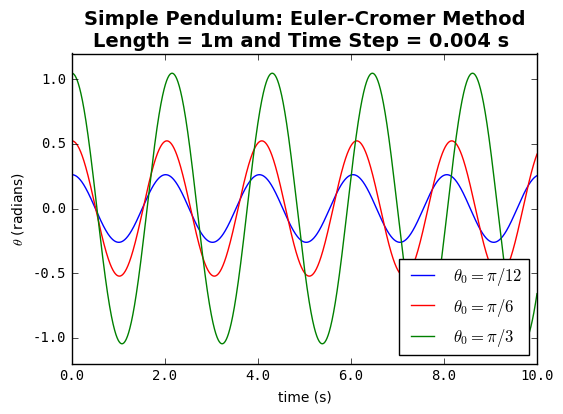

In [14]:
#figure 1
#plot theta as a function of time 

plt.figure()
plt.plot(time, theta1, 'b', time, theta2,'r', time, theta3, 'g')
ax = plt.gca()

ax.set_title("Simple Pendulum: Euler-Cromer Method\n\
Length = 1m and Time Step = 0.004 s ",\
family='mger the period onospace',size=14, weight='bold')

ax.set_xlabel("time (s)")
ax.set_ylabel("$\\theta$ (radians)")

ax.set_ylim(bottom=-1.2, top=1.2)

ax.set_xticklabels(ax.get_xticks(), family='monospace', fontsize=10)
ax.set_yticklabels(ax.get_yticks(), family='monospace', fontsize=10)

ax.legend(("$\\theta_{0} = \pi/12$","$\\theta_{0} = \pi/6$",\
"$\\theta_{0} = \pi/3$",),fontsize=12, loc= 4)

plt.show()

Figure 1: Figure 1: $\theta$ as a function of time for three simple pendulums--- all with a
different initial displacement angle. $\theta$ was calculated for each plot using the
Euler-Cromer method with the ```pendulum_euler_cromer function```.

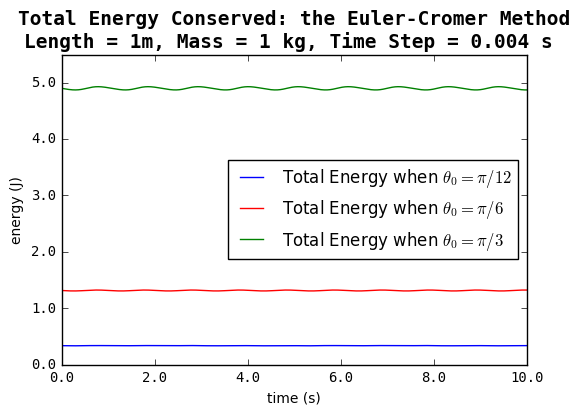

In [7]:
#figure 2
#plot enrgy as a function of time 


plt.figure()
plt.plot( time,energy1, 'b', time,energy2, 'r', time,energy3, 'g')
ax = plt.gca()

ax.set_title("Total Energy Conserved: the Euler-Cromer Method\n\
Length = 1m, Mass = 1 kg, Time Step = 0.004 s ",\
family='monospace',size=14, weight='bold')

ax.set_xlabel("time (s)")
ax.set_ylabel("energy (J)")

ax.set_ylim(bottom=0, top=5.5)

ax.set_xticklabels(ax.get_xticks(), family='monospace', fontsize=10)
ax.set_yticklabels(ax.get_yticks(), family='monospace', fontsize=10)

ax.legend(("Total Energy when $\\theta_{0} = \pi/12$",\
"Total Energy when $\\theta_{0} = \pi/6$",\
"Total Energy when $\\theta_{0} = \pi/3$",),fontsize=12, loc= 5)

plt.show()

Figure 2: Total Energy as a function of time for the same three simple pendulums. As in Figure 1--- all with a different initial displacement angle. Total Energy was calculated for each plot using the Euler-Cromer method with the ```pendulum_and_energy_euler_cromer``` function. 

In [8]:
#find period of ossilation for all 
#three different initial displacement values 
#very simple by the way that the functions were written
dt=0.004 
print(np.argmin(theta1[0:int(1.8/dt)]))
print(np.argmin(theta2[0:int(1.8/dt)]))
print(np.argmin(theta3[0:int(1.8/dt)]))

251
255
269


In [9]:
#0:argmin * 2, to get time representing full period index, 
#but need to include the last index so +1


T1 = theta1[0:251*2+1]
time_theta1 = time[0:251*2+1]

T2 = theta2[0:255*2+1]
time_theta2 = time[0:255*2+1]
                          
T3 = theta3[0:269*2+1]
time_theta3 = time[0:269*2+1]

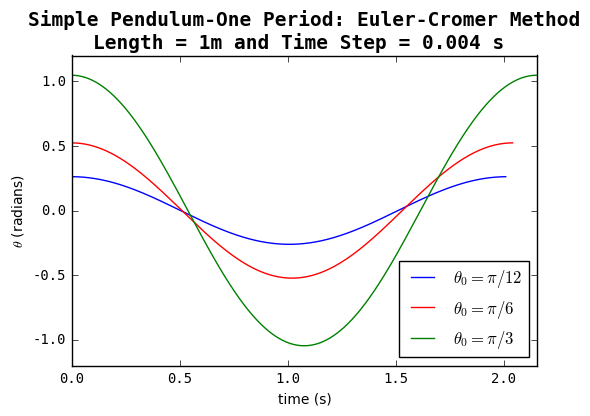

In [10]:
#figure 3
#plot theta as a function of time for a period of ossilation 

plt.figure()
plt.plot(time_theta1, T1, 'b', time_theta2, T2, 'r', time_theta3, T3, 'g')
ax = plt.gca()

ax.set_title("Simple Pendulum-One Period: Euler-Cromer Method\n\
Length = 1m and Time Step = 0.004 s ",\
family='monospace',size=14, weight='bold')

ax.set_xlabel("time (s)")
ax.set_ylabel("$\\theta$ (radians)")

ax.set_xlim(left=0, right=2.153)
ax.set_ylim(bottom=-1.2, top=1.2)

ax.set_xticklabels(ax.get_xticks(), family='monospace', fontsize=10)
ax.set_yticklabels(ax.get_yticks(), family='monospace', fontsize=10)

ax.legend(("$\\theta_{0} = \pi/12$","$\\theta_{0} =\
\pi/6$","$\\theta_{0} = \pi/3$",),fontsize=12, loc= 4)

plt.show()

Figure 3: $\theta$ as a function of time for only ONE period of oscillation for three simple
pendulums. As in Figure 1--- all with a different initial displacement angle. $\theta$  was
calculated for each plot using the Euler-Cromer method with the ```pendulum_euler_cromer``` function as in Figure 1. But to find the Period, T, fancy indexing was used after finding the $-\theta_{0}$ value with numpy argmin function.

In [11]:
#theta0 = np.pi/12
#theta vales for a period of oscilation
T1

array([ 0.26179939,  0.2617588 ,  0.26167765,  0.26155592,  0.26139365,
        0.26119086,  0.26094758,  0.26066384,  0.2603397 ,  0.25997519,
        0.25957037,  0.25912531,  0.25864008,  0.25811473,  0.25754937,
        0.25694406,  0.25629891,  0.25561401,  0.25488947,  0.25412538,
        0.25332188,  0.25247908,  0.25159712,  0.25067611,  0.24971621,
        0.24871757,  0.24768032,  0.24660463,  0.24549067,  0.2443386 ,
        0.24314859,  0.24192084,  0.24065552,  0.23935283,  0.23801296,
        0.23663613,  0.23522254,  0.2337724 ,  0.23228594,  0.23076339,
        0.22920497,  0.22761093,  0.2259815 ,  0.22431695,  0.22261751,
        0.22088345,  0.21911504,  0.21731255,  0.21547625,  0.21360643,
        0.21170336,  0.20976735,  0.20779869,  0.20579767,  0.20376462,
        0.20169984,  0.19960364,  0.19747636,  0.19531831,  0.19312982,
        0.19091125,  0.18866292,  0.18638518,  0.18407839,  0.18174289,
        0.17937906,  0.17698725,  0.17456783,  0.17212118,  0.16

In [12]:
#theta0 = np.pi/12
#time vales for a period of oscilation
time_theta1

array([ 0.   ,  0.004,  0.008,  0.012,  0.016,  0.02 ,  0.024,  0.028,
        0.032,  0.036,  0.04 ,  0.044,  0.048,  0.052,  0.056,  0.06 ,
        0.064,  0.068,  0.072,  0.076,  0.08 ,  0.084,  0.088,  0.092,
        0.096,  0.1  ,  0.104,  0.108,  0.112,  0.116,  0.12 ,  0.124,
        0.128,  0.132,  0.136,  0.14 ,  0.144,  0.148,  0.152,  0.156,
        0.16 ,  0.164,  0.168,  0.172,  0.176,  0.18 ,  0.184,  0.188,
        0.192,  0.196,  0.2  ,  0.204,  0.208,  0.212,  0.216,  0.22 ,
        0.224,  0.228,  0.232,  0.236,  0.24 ,  0.244,  0.248,  0.252,
        0.256,  0.26 ,  0.264,  0.268,  0.272,  0.276,  0.28 ,  0.284,
        0.288,  0.292,  0.296,  0.3  ,  0.304,  0.308,  0.312,  0.316,
        0.32 ,  0.324,  0.328,  0.332,  0.336,  0.34 ,  0.344,  0.348,
        0.352,  0.356,  0.36 ,  0.364,  0.368,  0.372,  0.376,  0.38 ,
        0.384,  0.388,  0.392,  0.396,  0.4  ,  0.404,  0.408,  0.412,
        0.416,  0.42 ,  0.424,  0.428,  0.432,  0.436,  0.44 ,  0.444,
      

In [13]:
#theta0 = np.pi/6
#theta vales for a period of oscilation
T2

array([ 0.52359878,  0.52352038,  0.52336359,  0.52312843,  0.52281494,
        0.52242315,  0.52195312,  0.52140492,  0.52077861,  0.52007429,
        0.51929205,  0.51843199,  0.51749423,  0.51647891,  0.51538615,
        0.51421611,  0.51296895,  0.51164484,  0.51024396,  0.50876649,
        0.50721265,  0.50558265,  0.5038767 ,  0.50209505,  0.50023793,
        0.49830561,  0.49629835,  0.49421642,  0.49206012,  0.48982974,
        0.48752558,  0.48514798,  0.48269725,  0.48017375,  0.47757781,
        0.4749098 ,  0.47217009,  0.46935907,  0.46647712,  0.46352465,
        0.46050208,  0.45740983,  0.45424833,  0.45101803,  0.44771938,
        0.44435285,  0.44091892,  0.43741807,  0.4338508 ,  0.43021761,
        0.42651903,  0.42275558,  0.4189278 ,  0.41503623,  0.41108144,
        0.407064  ,  0.40298447,  0.39884345,  0.39464154,  0.39037934,
        0.38605748,  0.38167657,  0.37723725,  0.37274018,  0.36818601,
        0.36357541,  0.35890904,  0.35418759,  0.34941176,  0.34

### Results:

#### Relationship Between the Amplitude and Period of the Oscillation:

It is clear that increasing the initial displacement angle for the simple pendulum systems
increased the amplitude, and the amplitude affected the period of oscillation. The larger the
amplitude, the longer the period of oscillation. This was visually seen more and more after
each period of oscillation as the three systems separated more and more as time increased as
seen in Figure 1.

#### Conservation of Energy:

For each of the three plots in Figure 2, There was an approximate conservation of total energy
for the respective systems using the Euler-Cromer method. However, using the Euler method,
as seen in the lab, the total energy monotonically increases in time when the system is solved.
With the Euler-Cromer method total energy is not constant (the energy changes by a term
proportional to dt2 at each time step), as there is a slight oscillation (not completely smoothed
for each plot, refer to figure 2). For the harmonic oscillator, the dt2 term oscillates over a cycle
and does give an average zero-total contribution. Therefore, the total energy is approximately
conserved. For the curves to be smoothed (smaller peaks), the time step must be smaller than
given in the prompt. Therefore, 0.004 s was chosen as the dt (time step) and was sufficiently
small enough for the curves to approximately smooth out.

#### Calculation of the Period of Oscillation Numerically:

Solving for the Period, T, numerically for all three simple pendulums was very simple given
the function ```pendulum_euler_cromer`` and some fancy indexing--after finding the index for the
-θ 0 value with the numpy.argmin function for all three systems. Now, numerically, it is shown
what was previously speculated, visually, with Figure 1; Using the Euler-Cromer method for
solving the θ as a function of time at each step numerically (for all the simple pendulum
systems) confirms that the greater amplitude the longer the period. The period, T, was
T=2.008 seconds, T=2.040 seconds and T=2.152 seconds for the simple pendulum systems
with the initial displacement angle of pi/12, pi/6, and pi/3, respectively.